## Python Test Example for Interviews | Intermediate

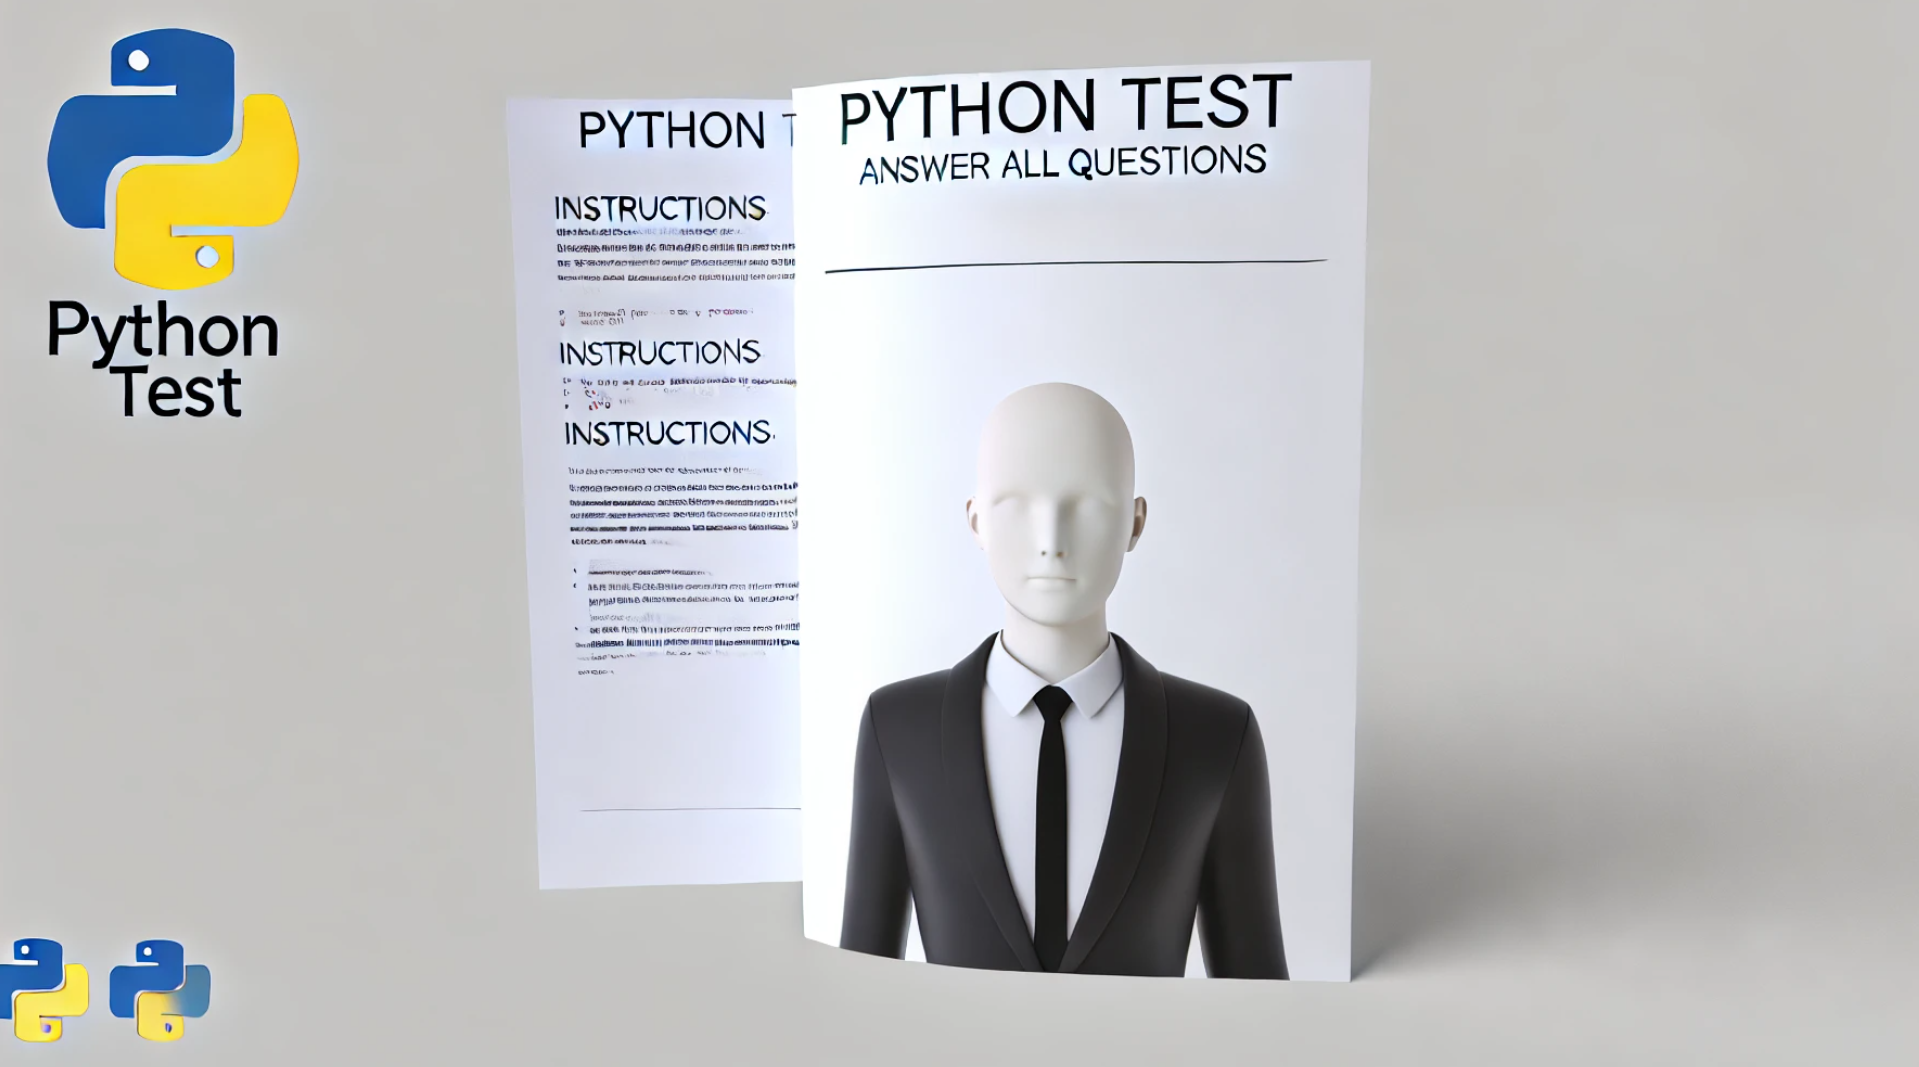

In [110]:
import os
from IPython.display import Image
PATH = "C:\\Users\\pitsi\\Desktop\\2024 Youtube\\22. Python top 5 Questions &  Answers\\"
Image("Pic 2.png",width=900, height=700)

### Agenda:

Complete the following Questions in 20 mins:

1. What is the average retail_price per model for 2023. Order desc
2. What is the total retail_price per make and Cylinders for AWD cars. Order desc by 
3. Show the average Used Prices per Model and year for cars that have 500+ horsepower
4. Show the top 10 models and make in terms of highway fuel economy that have a retail price less than 50k
5. Show all the cars that do not have Used prices data
 price

## 0. Raw Data - Loading the Excel data

Dataset Information: We have 3 files:
- [yt_car_main]: This table has information about cars and their retail price
- [yt_car_info]: Has additional information abour the cars
- [yt_car_used_prices]: This  table has the Used prices of the cars

In [114]:
import pandas as pd
import os
import numpy as np

# loading excel
car_data = pd.read_csv("yt_car_main.csv")
car_info = pd.read_csv("yt_car_info.csv")
car_used_prices = pd.read_csv("yt_car_used_prices.csv")

# to see your directory: os.getcwd()
pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns

car_data.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,"$33,653",Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,"$35,533",Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,"$38,917",Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,"$37,037",Compact,Sedan


## 1. What is the average retail_price per model for 2023. Order desc

In [116]:
car_data[car_data['Year']==2023].groupby(['Make'], as_index = False).agg({"Retail_Price": "mean"}).sort_values('Retail_Price', ascending=False)

,Make,Retail_Price
3,Bentley,269407.142857
0,Aston Martin,228512.500000
5,Mercedes-Benz,79459.365079
2,BMW,74527.011494
1,Audi,71483.464567
4,Ford,51802.037037
6,Nissan,42102.612613


## 2. What is the total retail_price per make and Cylinders for AWD cars. Order desc by 

In [118]:
# creating the join
join1 = car_data.merge(car_info, how = 'left', on = 'index')

# answering the question
join1[['Make','Cylinders','Retail_Price']][join1['Drivetrain'] == 'AWD'].groupby(['Make','Cylinders'], as_index = False).agg({'Retail_Price':'sum'}).sort_values('Retail_Price',ascending = False)



,Make,Cylinders,Retail_Price
10,Bentley,V8,8171600
4,Audi,V6,5755900
11,Bentley,W12,4874900
1,Audi,I4,4647600
14,Ford,V6,4485340
19,Mercedes-Benz,V8,4201400
8,BMW,V8,4039600
9,Bentley,V6,3811300
7,BMW,I6,3075850
15,Mercedes-Benz,I4,2924880


## 3. Show the average Used Prices per Model and year for cars that have 500+ horsepower

In [120]:
# joining main with used prices
join2 = car_data.merge(car_used_prices, how = 'left', on = 'index')

# cleaning horsepower
car_info['Horsepower No'] = car_info['Horsepower'].str[0:3].astype(float)

# creating a list with horsepower > 500
horse_500 = car_info['index'][car_info['Horsepower No'] > 500]

join2[['Model','Year','Used Price']][join2['index'].isin(horse_500)].groupby(['Model','Year'], as_index = False).agg({'Used Price':'mean'}).sort_values('Used Price',ascending = False).dropna()

,Model,Year,Used Price
22,DBX707,2024,242000.000000
92,i4,2024,222100.000000
88,XM,2024,204250.000000
10,ALPINA XB7,2024,149400.000000
8,ALPINA B8 Gran Coupe,2024,149300.000000
69,RS e-tron GT,2024,147100.000000
53,M8,2024,143800.000000
55,M8 Gran Coupe,2024,138800.000000
65,RS 7,2024,127800.000000
84,X6 M,2024,127200.000000


### 4. Show the top 10 models and make in terms of highway fuel economy that have a retail price less than 50k

In [122]:
# cleaning the HFE
car_info['Highway Fuel Economy'] = car_info['Highway Fuel Economy'].str[0:2].astype(float)

In [123]:
# joining main table with HFE
join3 = car_data.merge(car_info[['index','Highway Fuel Economy']], how = 'left', on = 'index')

join3[['Make','Model', 'Retail_Price', 'Highway Fuel Economy']][join3['Retail_Price'] < 50000].sort_values('Highway Fuel Economy').head(10)

,Make,Model,Retail_Price,Highway Fuel Economy
979,Ford,Bronco,40750,18.0
978,Ford,Bronco,41545,18.0
983,Ford,Bronco,44305,18.0
977,Ford,Bronco,43035,18.0
972,Ford,Bronco,38540,18.0
261,Ford,Bronco,49475,18.0
260,Ford,Bronco,48555,18.0
258,Ford,Bronco,44070,18.0
257,Ford,Bronco,43330,18.0
982,Ford,Bronco,46295,18.0


## 5. Show all the cars that do not have Used prices data

In [125]:
# creating a list
cars_with_used_prices = car_used_prices['Used Price'].dropna()

# answering the question
car_data[~car_data['index'].isin(cars_with_used_prices)].head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,"$33,653",Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,"$35,533",Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,"$38,917",Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,"$37,037",Compact,Sedan


In [126]:
car_data[~car_data['index'].isin(cars_with_used_prices)].count()

index            1559
Make             1559
Model            1559
Year             1559
Trim             1559
Retail_Price     1559
Invoice Price    1044
Body Size        1559
Body Style       1559
dtype: int64

# YouTube Test - Start Here

Dataset Information: We have 3 files:
- car_data: This table has information about cars and their retail price
- car_info: Has additional information abour the cars
- car_used_prices: This  table has the Used prices of the cars

In [129]:
import pandas as pd
import os
import numpy as np

# loading excel
car_data = pd.read_csv("yt_car_main.csv")
car_info = pd.read_csv("yt_car_info.csv")
car_used_prices = pd.read_csv("yt_car_used_prices.csv")

# to see your directory: os.getcwd()
pd.set_option('display.max_rows', None) # display all rows
pd.set_option('display.max_columns', None) # display all columns

car_data.head()

,index,Make,Model,Year,Trim,Retail_Price,Invoice Price,Body Size,Body Style
0,0,Aston Martin,DBX707,2024,Base,242000,NaN,Large,SUV
1,1,Audi,A3,2024,Premium w/40 TFSI,35800,"$33,653",Compact,Sedan
2,2,Audi,A3,2024,Premium w/40 TFSI,37800,"$35,533",Compact,Sedan
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400,"$38,917",Compact,Sedan
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400,"$37,037",Compact,Sedan


In [130]:
car_info.head()

,index,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [131]:
car_used_prices.head()

,index,Used Price
0,0,242000
1,1,35800
2,2,37800
3,3,41400
4,4,39400


### 1. What is the average retail_price per model for 2023. Order desc

### 2. What is the total retail_price per make and Cylinders for AWD cars. Order by desc

### 3. Show the average Used Prices per Model and year for cars that have 500+ horsepower

### 4. Show the top 10 models and make in terms of highway fuel economy (min) that have a retail price less than 50k

### 5. Show all the cars that do not have Used prices data